In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import sys
import pickle
# change this to include MNM_mcnb.py from MAC-POSTS
sys.path.append("/home/alanpi/Desktop/MAC-POSTS/side_project/network_builder")
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
from matplotlib import colors
import matplotlib
import matplotlib.dates as mdates
import datetime
import seaborn as sns
import math
from scipy import stats
from sklearn.metrics import r2_score

In [3]:
import MNMAPI
from MNM_mcnb import *
from cartruckmodels import *

## Initialize the simulator

In [4]:
data_folder = '../data/input_files_MckeesRocks_SPC'
nb = MNM_network_builder()
nb.load_from_folder(data_folder)
mcdta = Cartruck_Simulator(nb)

Init simulation


In [5]:
df_count_car = pd.read_csv('smoothedCounts_7-12AM_6hours_car.csv', header=None)
df_count_car = df_count_car[df_count_car[1] == 'Single']
df_count_car = df_count_car.set_index([0])
df_count_truck = pd.read_csv('smoothedCounts_7-12AM_6hours_truck.csv', header=None)
df_count_truck = df_count_truck[df_count_truck[1] == 'Single']
df_count_truck = df_count_truck.set_index([0])
df_speed_car = pd.read_csv('speed_7-12AM_6hours_car.csv', header=None)
df_speed_car = df_speed_car.set_index([0])
df_speed_truck = pd.read_csv('speed_7-12AM_6hours_truck.csv', header=None)
df_speed_truck = df_speed_truck.set_index([0])

df_count_car

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
14337,Single,492.1250,569.25,583.5000,597.750,612.0000,626.25,591.0625,555.875,520.6875,...,398.0000,399.500,401.0000,402.50,402.6250,402.750,402.8750,403.00,414.5625,426.125
16386,Single,713.5000,856.00,882.6250,909.250,935.8750,962.50,942.1250,921.750,901.3750,...,576.7500,538.250,499.7500,461.25,456.3750,451.500,446.6250,441.75,436.4375,431.125
14846,Single,75.6875,85.75,93.1250,100.500,107.8750,115.25,108.3750,101.500,94.6250,...,85.5000,86.250,87.0000,87.75,87.0000,86.250,85.5000,84.75,91.6875,98.625
16400,Single,224.8750,264.00,308.9375,353.875,398.8125,443.75,430.4375,417.125,403.8125,...,298.0625,284.875,271.6875,258.50,260.1875,261.875,263.5625,265.25,274.6875,284.125
1008657,Single,103.5000,103.50,117.5625,131.625,145.6875,159.75,162.0000,164.250,166.5000,...,177.8750,178.250,178.6250,179.00,183.8750,188.750,193.6250,198.50,198.5000,198.500
7186,Single,149.3125,174.25,189.8750,205.500,221.1250,236.75,229.9375,223.125,216.3125,...,144.7500,138.500,132.2500,126.00,124.8750,123.750,122.6250,121.50,124.2500,127.000
1008659,Single,123.7500,143.00,165.1875,187.375,209.5625,231.75,229.4375,227.125,224.8125,...,165.6250,167.500,169.3750,171.25,170.2500,169.250,168.2500,167.25,167.1875,167.125
1004571,Single,333.0625,368.25,368.8125,369.375,369.9375,370.50,349.0000,327.500,306.0000,...,229.1250,223.500,217.8750,212.25,209.1250,206.000,202.8750,199.75,197.1875,194.625
21534,Single,74.9375,83.00,91.6250,100.250,108.8750,117.50,113.6250,109.750,105.8750,...,78.1250,77.250,76.3750,75.50,78.3125,81.125,83.9375,86.75,90.0625,93.375


In [6]:
df_count_truck

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,,,,,,,,,,,,,,,,,,,,,
14337,Single,80.3125,87.50,86.8750,86.250,85.6250,85.00,84.8750,84.750,84.6250,...,79.8125,82.875,85.9375,89.00,87.5625,86.125,84.6875,83.25,81.1250,79.000
16386,Single,45.1250,52.00,47.8750,43.750,39.6250,35.50,36.6875,37.875,39.0625,...,46.8125,46.125,45.4375,44.75,44.1875,43.625,43.0625,42.50,39.8750,37.250
14846,Single,21.8125,24.50,24.4375,24.375,24.3125,24.25,23.6875,23.125,22.5625,...,27.1875,27.625,28.0625,28.50,29.6250,30.750,31.8750,33.00,30.0000,27.000
16400,Single,18.1875,20.25,20.5000,20.750,21.0000,21.25,21.0625,20.875,20.6875,...,30.3125,27.625,24.9375,22.25,22.8125,23.375,23.9375,24.50,26.1875,27.875
1008657,Single,7.7500,7.75,8.1250,8.500,8.8750,9.25,11.4375,13.625,15.8125,...,15.7500,15.250,14.7500,14.25,14.3750,14.500,14.6250,14.75,14.7500,14.750
7186,Single,8.9375,10.50,10.4375,10.375,10.3125,10.25,11.5625,12.875,14.1875,...,10.4375,11.625,12.8125,14.00,12.6875,11.375,10.0625,8.75,8.6875,8.625
1008659,Single,6.6250,7.25,8.5625,9.875,11.1875,12.50,12.5625,12.625,12.6875,...,10.5000,10.500,10.5000,10.50,10.8750,11.250,11.6250,12.00,11.5625,11.125
1004571,Single,17.9375,19.00,19.2500,19.500,19.7500,20.00,20.1250,20.250,20.3750,...,15.3125,16.625,17.9375,19.25,19.7500,20.250,20.7500,21.25,20.3750,19.500
21534,Single,15.5000,16.50,19.2500,22.000,24.7500,27.50,27.5000,27.500,27.5000,...,23.3125,23.875,24.4375,25.00,23.6250,22.250,20.8750,19.50,20.6250,21.750


In [7]:
df_speed_car

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,,,,,,,,,,,,,,,,,,,,,
2722,14.6575,8.6996,11.0770,23.5949,8.3038,14.4819,12.0173,13.0376,19.6425,16.6314,...,13.1320,11.3447,20.1540,20.8290,8.3602,8.4965,12.1794,4.8241,16.7316,12.9918
19585,67.8501,68.0558,68.0610,67.6801,67.9328,68.5397,69.4859,69.5644,68.0074,67.1175,...,67.8556,67.5823,68.3590,68.1635,68.1162,67.2299,66.7449,67.6700,69.2669,67.7827
18810,50.1324,33.3714,42.1172,35.7281,7.4106,18.8570,38.0855,45.3722,48.1724,35.6666,...,45.2913,23.3820,11.7881,38.9166,30.7620,42.3781,38.8882,28.0355,35.9546,26.8917
6884,20.3305,18.3109,14.8122,16.5897,62.8396,15.0077,16.6017,17.3969,18.1038,18.1110,...,11.5206,25.7924,9.5763,8.8209,34.5618,9.8397,14.8973,28.9523,21.9440,14.4007
6577,43.0320,47.8665,37.4607,47.2939,50.8960,47.0044,51.9111,46.7956,47.4071,43.6129,...,43.2865,45.6230,50.7284,43.8720,52.1017,48.7040,48.8496,50.6270,37.2750,48.5977
13703,30.9469,5.1800,35.1958,29.2409,35.3730,24.8159,30.5943,33.4227,23.3913,31.7626,...,32.2946,16.7155,29.1007,26.9564,24.7451,29.0457,12.4453,34.6013,22.3629,9.0470
2751,36.8352,38.1054,28.3348,36.8352,34.7502,2.6104,34.5330,37.5869,37.3015,36.8352,...,33.8282,34.3612,6.3613,33.3422,33.0941,34.8049,29.2730,22.5983,29.4682,24.6282
16136,39.0556,37.9730,36.8723,36.8937,38.2011,35.3360,39.9313,39.1878,41.1134,39.5983,...,37.8319,37.4146,41.7081,35.8337,39.9450,40.3463,39.9313,38.5484,29.4627,41.2253
8474,54.7513,58.9338,57.9473,55.5590,55.5615,54.1172,53.4711,54.5277,56.4336,54.3646,...,53.0096,55.0605,55.5578,55.0992,50.5588,25.4613,51.4107,52.2636,53.2759,56.3086


In [8]:
list_count_car = list(df_count_car.index)
list_count_truck = list(df_count_truck.index)
list_speed_car = list(df_speed_car.index)
list_speed_truck = list(df_speed_truck.index)
link_ID_list = list(set().union(list_count_car, list_count_truck, list_speed_car, list_speed_truck))
print(len(link_ID_list))
link_ID_list.remove(20845)
print(len(link_ID_list))

1158
1157


In [9]:
mcdta.run_simulation(data_folder, link_ID_list)

## Overall stats

In [10]:
mcdta.print_out_overall_stats()

In [11]:
veh_stats = mcdta.get_enroute_and_queue_veh_stats_agg()
veh_stats[:100,1]

array([  0. ,  61. ,  19. ,   2.5,   4.5,   4.5,   2.5,   3.5,   4. ,
         3.5,   2.5,   2.5,   3.5,  82. ,  35.5,  23. ,  26.5,  32.5,
        34.5,  41.5,  37. ,  39. ,  33.5,  37. ,  41. , 141.5,  85.5,
        78. ,  81. ,  97.5,  96.5, 101. ,  98.5,  99. ,  98.5, 102. ,
        98.5, 200.5, 160. , 151. , 160.5, 171.5, 180. , 183.5, 184.5,
       189. , 194. , 195. , 200. , 327.5, 269.5, 259.5, 267.5, 275. ,
       273. , 277. , 282. , 295. , 315.5, 306. , 309. , 418. , 360. ,
       353. , 370.5, 366. , 368.5, 370. , 380.5, 371. , 371. , 368.5,
       364. , 488.5, 431.5, 447. , 439. , 431.5, 456. , 446.5, 437. ,
       459. , 443. , 449. , 426.5, 575.5, 520.5, 538.5, 538. , 545. ,
       536.5, 518. , 519.5, 518. , 521.5, 523.5, 515. , 667.5, 594.5,
       602. ])

In [12]:
en = veh_stats[:,0]
qu = veh_stats[:,1]
mo = veh_stats[:,2]

<Figure size 432x288 with 0 Axes>

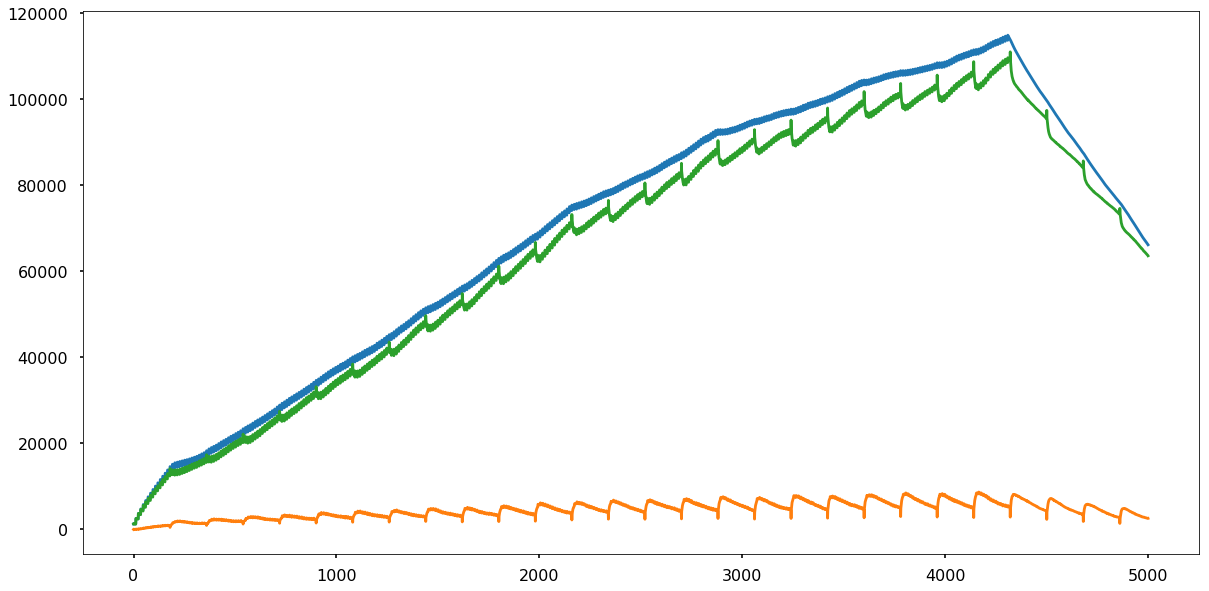

In [13]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(en)
plt.plot(qu)
plt.plot(mo)

## Count

In [14]:
df_count_car2 = pd.read_csv('smoothedCounts_7-12AM_6hours_car.csv', header=None)
df_count_car2 = df_count_car2.set_index([0])
df_count_truck2 = pd.read_csv('smoothedCounts_7-12AM_6hours_truck.csv', header=None)
df_count_truck2 = df_count_truck2.set_index([0])
list_count_car2 = list(df_count_car2.index)
list_count_truck2 = list(df_count_truck2.index)

MR_link_ID_list = [1007167,7167,1007186,7186,4150,7189,1007174,7174,1003863,3863,7173,1007173,
                   1022923,22923,1006702,6702,1003805,3805,1003890,3890,1022922,7171,7180,1007180,
                   7176,1007176,1007177,7177,3862,1003862,3858,1003858,1003857,3857,3832,1003847,
                   1007154,7154,1007159,7159,1007179,7179]

for _id in MR_link_ID_list:
    if _id in list_count_car2:
        print(_id)

print("\n")
for _id in MR_link_ID_list:
    if _id in list_count_truck2:
        print(_id)

print("\n")        
for _id in MR_link_ID_list:
    if _id in list_count_car:
        print(_id)

print("\n")
for _id in MR_link_ID_list:
    if _id in list_count_truck:
        print(_id)

1007167
1007186
7186
1007173
1022923
3858
1003857


1007167
1007186
7186
1007173
1022923
3858
1003857


1007186
7186
3858
1003857


1007186
7186
3858
1003857


In [15]:
print(df_count_car.loc[[7186], 2:].values.flatten())

print(df_count_car.loc[[1007186], 2:].values.flatten())

[149.3125 174.25   189.875  205.5    221.125  236.75   229.9375 223.125
 216.3125 209.5    194.875  180.25   165.625  151.     144.75   138.5
 132.25   126.     124.875  123.75   122.625  121.5    124.25   127.    ]
[ 89.1875 102.75   107.5    112.25   117.     121.75   119.75   117.75
 115.75   113.75   109.375  105.     100.625   96.25    97.375   98.5
  99.625  100.75   103.875  107.     110.125  113.25   118.     122.75  ]


In [16]:
sns.set(style="darkgrid", color_codes=True)

In [17]:
def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

def rmsn(predictions, targets):
    return np.sqrt(np.sum((predictions - targets) ** 2) * len(predictions)) / np.sum(targets)

def r2(predictions, targets):
    diff = predictions - targets
    ss_e = np.sum(diff ** 2)
    ss_t = np.sum((targets - np.mean(targets)) ** 2)
    return 1 - ss_e / ss_t

def r2_score(sim, measured):
    return r2_score(measured, sim)

0.4850658416283213
158.2352426231895
0.555792290079533
0.4378919549620959


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


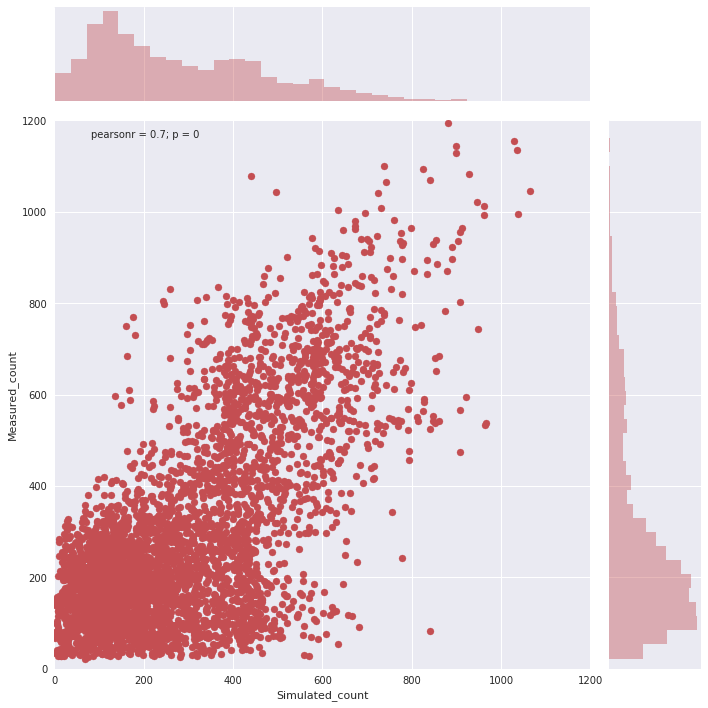

In [20]:
sys.setrecursionlimit(3000)
start_intervals = np.array([i * 180 for i in range(24)])
end_intervals = np.array([i * 180 + 179 for i in range(24)])

car_link_count = mcdta.get_link_car_count(start_intervals, end_intervals)

x = []
y = []
for link_ID in list_count_car:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        if (np.sum(car_link_count[idx, :]) > 2000):
            x += list(car_link_count[idx, :]*1.15)
            y += list(df_count_car.loc[[link_ID], 2:].values.flatten())
#             x += list(car_link_count[idx, 7:-7])
#             y += list(df_count_car.loc[[link_ID], 9:18].values.flatten())

print(rsquared(np.array(x),np.array(y)))
print(rmse(np.array(x),np.array(y)))
print(rmsn(np.array(x),np.array(y)))
print(r2(np.array(x),np.array(y)))
# print(r2_score(x,y))

count_reg = pd.DataFrame({'Simulated_count': x, 'Measured_count': y})
g = sns.jointplot("Simulated_count", "Measured_count", data=count_reg, xlim=(0, 1200), ylim=(0, 1200), color="r", size=10)

0.5304086632527526
21.671717232303397
0.6008128650231154
0.5030695147686299


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


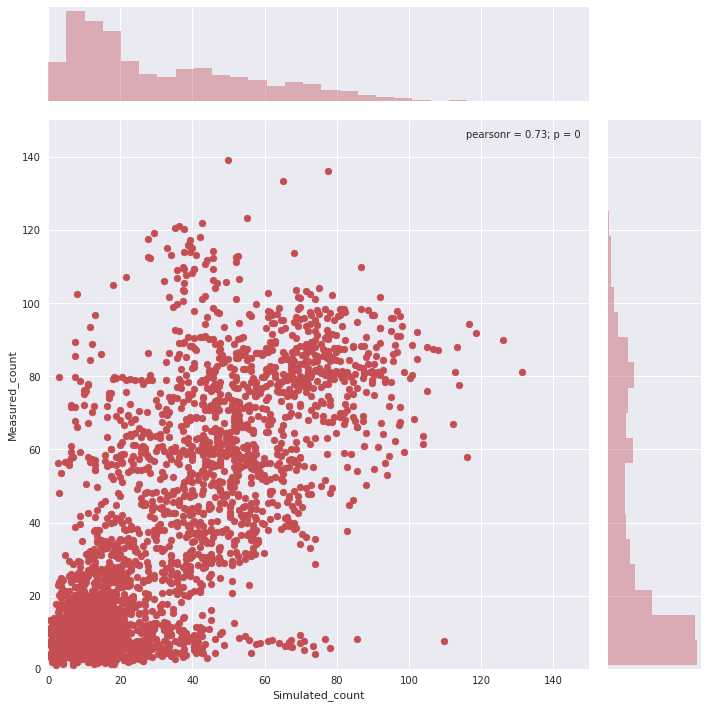

In [83]:
truck_link_count = mcdta.get_link_truck_count(start_intervals, end_intervals)

x2 = []
y2 = []
for link_ID in list_count_truck:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        if (np.sum(truck_link_count[idx, :]) > 200):
            x2 += list(truck_link_count[idx, :]*1.05)
            y2 += list(df_count_truck.loc[[link_ID], 2:25].values.flatten())
#             x2 += list(truck_link_count[idx, 7:-7])
#             y2 += list(df_count_truck.loc[[link_ID], 9:18].values.flatten())

print(rsquared(np.array(x2),np.array(y2)))
print(rmse(np.array(x2),np.array(y2)))
print(rmsn(np.array(x2),np.array(y2)))
print(r2(np.array(x2),np.array(y2)))

count_reg2 = pd.DataFrame({'Simulated_count': x2, 'Measured_count': y2})
g2 = sns.jointplot("Simulated_count", "Measured_count", data=count_reg2, xlim=(0, 150), ylim=(0, 150), color="r", size=10)

## Speed

0.0007663189398238943
71.82231418975726
2.6560664905643847
-16.030763368948943


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


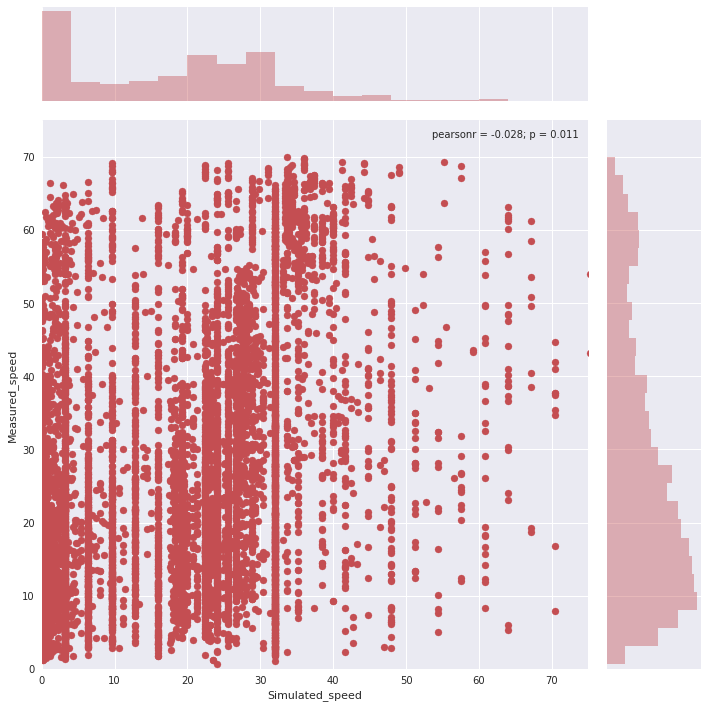

In [40]:
mid_intervals = np.array([i * 180 + 90 for i in range(24)])
car_link_speed = mcdta.get_link_car_speed(mid_intervals)

x3 = []
y3 = []
for link_ID in list_speed_car:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        _tmp = list(car_link_speed[idx, 8:-7]/3600)
        for i in range(len(_tmp)):
            if _tmp[i] > 200:
                _tmp[i] = 200
            if _tmp[i] < 0:
                _tmp[i] = 0        
        x3 += _tmp
        y3 += list(df_speed_car.loc[[link_ID], 10:18].values.flatten())

print(rsquared(np.array(x3),np.array(y3)))
print(rmse(np.array(x3),np.array(y3)))
print(rmsn(np.array(x3),np.array(y3)))
print(r2(np.array(x3),np.array(y3)))

speed_reg = pd.DataFrame({'Simulated_speed': x3, 'Measured_speed': y3})
g = sns.jointplot("Simulated_speed", "Measured_speed", data=speed_reg, xlim=(0, 75), ylim=(0, 75), color="r", size=10)

In [34]:
list(np.array(x3)/3600)

[6.4,
 6.4,
 6.4,
 6.4,
 inf,
 inf,
 32.0,
 6.4,
 32.0,
 22.400000000000006,
 22.400000000000006,
 22.400000000000006,
 22.400000000000006,
 22.400000000000006,
 22.400000000000006,
 22.400000000000006,
 22.400000000000006,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 32.0,
 1.6,
 6.4,
 59.2,
 118.4,
 39.46666666666667,
 39.46666666666667,
 31.157894736842106,
 59.2,
 39.46666666666667,
 39.46666666666667,
 31.157894736842106,
 inf,
 inf,
 inf,
 inf,
 19.2,
 19.2,
 32.0,
 32.0,
 32.0,
 3.2,
 inf,
 3.2,
 inf,
 3.2,
 3.2,
 inf,
 inf,
 3.2,
 23.272727272727277,
 36.57142857142857,
 32.0,
 32.0,
 25.6,
 25.6,
 32.0,
 36.57142857142857,
 25.6,
 41.6,
 41.6,
 35.65714285714286,
 41.6,
 49.92,
 35.65714285714286,
 41.6,
 41.6,
 35.65714285714286,
 60.8,
 60.8,
 30.4,
 30.4,
 inf,
 60.8,
 23.384615384615383,
 30.4,
 30.4,
 22.400000000000006,
 22.400000000000006,
 22.400000000000006,
 1.3176470588235296,
 inf,
 22.400000000000006,
 22.4000000

0.001073091507504987
58.04192619090681
2.089453420095603
-11.179597348451653


/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/alanpi/anaconda3/envs/MR_project/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


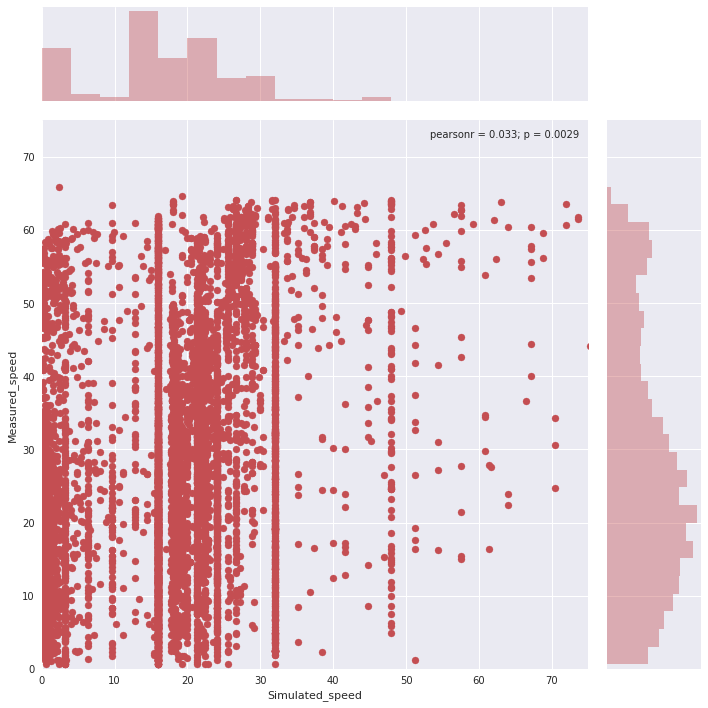

In [41]:
truck_link_speed = mcdta.get_link_truck_speed(mid_intervals)

x4 = []
y4 = []
for link_ID in list_speed_truck:
    if link_ID in link_ID_list:
        idx = link_ID_list.index(link_ID)
        _tmp = list(truck_link_speed[idx, 8:-7]/3600)
        for i in range(len(_tmp)):
            if _tmp[i] > 200:
                _tmp[i] = 200
            if _tmp[i] < 0:
                _tmp[i] = 0
        x4 += _tmp
        y4 += list(df_speed_truck.loc[[link_ID], 10:18].values.flatten())

print(rsquared(np.array(x4),np.array(y4)))
print(rmse(np.array(x4),np.array(y4)))
print(rmsn(np.array(x4),np.array(y4)))
print(r2(np.array(x4),np.array(y4)))

speed_reg2 = pd.DataFrame({'Simulated_speed': x4, 'Measured_speed': y4})
g = sns.jointplot("Simulated_speed", "Measured_speed", data=speed_reg2, xlim=(0, 75), ylim=(0, 75), color="r", size=10)

## Mckees Rocks

In [ ]:
MR_link_ID_list = [1007167,7167,1007186,7186,4150,7189,1007174,7174,1003863,3863,7173,1007173,
                   1022923,22923,1006702,6702,1003805,3805,1003890,3890,1022922,7171,7180,1007180,
                   7176,1007176,1007177,7177,3862,1003862,3858,1003858,1003857,3857,3832,1003847,
                   1007154,7154,1007159,7159,1007179,7179]
results = {}
for _id in MR_link_ID_list:
    

In [ ]:
data_folder2 = '../data/input_files_MckeesRocks_SPC2'
nb2 = MNM_network_builder()
nb2.load_from_folder(data_folder2)
mcdta2 = Cartruck_Simulator(nb2)

car_link_count2 = mcdta2.get_link_car_count(start_intervals, end_intervals)
truck_link_count2 = mcdta2.get_link_truck_count(start_intervals, end_intervals)

In [ ]:
results2 = {}
for _id in MR_link_ID_list:

In [ ]:
data_folder3 = '../data/input_files_MckeesRocks_SPC2'
nb3 = MNM_network_builder()
nb3.load_from_folder(data_folder3)
mcdta3 = Cartruck_Simulator(nb3)

car_link_count3 = mcdta2.get_link_car_count(start_intervals, end_intervals)
truck_link_count3 = mcdta2.get_link_truck_count(start_intervals, end_intervals)

In [ ]:
results3 = {}
for _id in MR_link_ID_list: